In [273]:
# ! pip install sweetviz # run this just if not installed

In [274]:
# ! pip install xgboost # run this just if not installed

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import sweetviz as sv

/Users/javierliro/miniforge3/envs/tensorflow+/lib/python3.9/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


## Exploratory Data Analysis

#### Preliminary Data Explore

In [5]:
train = pd.read_csv("data/train.csv")
test= pd.read_csv("data/test.csv")

In [6]:
train.head()

,id,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
0,0,2,0,0,2,1,0,0,9,2018,1,14,1,1,11,0,67.50,0,0
1,1,2,0,1,2,0,0,0,117,2018,7,29,0,0,0,0,72.25,0,0
2,2,2,0,0,1,0,0,0,315,2018,12,2,0,0,0,0,52.00,0,0
3,3,1,0,0,2,1,0,0,32,2018,12,1,1,0,0,0,56.00,0,0
4,4,2,0,1,0,0,0,0,258,2018,10,16,0,0,0,0,100.00,0,1


In [7]:
train.describe()

,id,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
count,42100.000000,42100.000000,42100.000000,42100.000000,42100.000000,42100.000000,42100.000000,42100.000000,42100.000000,42100.000000,42100.000000,42100.000000,42100.000000,42100.000000,42100.000000,42100.000000,42100.000000,42100.000000,42100.000000
mean,21049.500000,1.920713,0.141093,0.884632,2.398005,0.239192,0.025249,0.428931,103.888029,2017.856295,7.593539,15.902945,0.728504,0.029192,0.019715,0.175772,104.566377,0.571734,0.392019
std,12153.367503,0.524950,0.450128,0.885693,1.427330,0.587674,0.156884,0.832605,81.069343,0.350795,2.829395,8.888582,0.633529,0.168347,0.325837,1.732121,37.139165,0.775041,0.488207
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2017.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,10524.750000,2.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,37.000000,2018.000000,6.000000,8.000000,0.000000,0.000000,0.000000,0.000000,80.000000,0.000000,0.000000
50%,21049.500000,2.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,93.000000,2018.000000,8.000000,16.000000,1.000000,0.000000,0.000000,0.000000,99.450000,0.000000,0.000000
75%,31574.250000,2.000000,0.000000,2.000000,3.000000,0.000000,0.000000,1.000000,155.000000,2018.000000,10.000000,24.000000,1.000000,0.000000,0.000000,0.000000,123.300000,1.000000,1.000000
max,42099.000000,4.000000,9.000000,7.000000,17.000000,3.000000,1.000000,6.000000,443.000000,2018.000000,12.000000,31.000000,4.000000,1.000000,13.000000,58.000000,540.000000,5.000000,1.000000


In [8]:
train.drop('id', axis=1, inplace=True);
train.head()

,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
0,2,0,0,2,1,0,0,9,2018,1,14,1,1,11,0,67.50,0,0
1,2,0,1,2,0,0,0,117,2018,7,29,0,0,0,0,72.25,0,0
2,2,0,0,1,0,0,0,315,2018,12,2,0,0,0,0,52.00,0,0
3,1,0,0,2,1,0,0,32,2018,12,1,1,0,0,0,56.00,0,0
4,2,0,1,0,0,0,0,258,2018,10,16,0,0,0,0,100.00,0,1


In [9]:
train.dtypes

no_of_adults                              int64
no_of_children                            int64
no_of_weekend_nights                      int64
no_of_week_nights                         int64
type_of_meal_plan                         int64
required_car_parking_space                int64
room_type_reserved                        int64
lead_time                                 int64
arrival_year                              int64
arrival_month                             int64
arrival_date                              int64
market_segment_type                       int64
repeated_guest                            int64
no_of_previous_cancellations              int64
no_of_previous_bookings_not_canceled      int64
avg_price_per_room                      float64
no_of_special_requests                    int64
booking_status                            int64
dtype: object

In [10]:
train.shape

(42100, 18)

In [11]:
print ("total null values : ", train.isna().sum().sum())  # No null values

total null values :  0


In [12]:
print ("Total duplicate rows :", train.drop_duplicates().shape[0] - train.shape[0])

Total duplicate rows : 0


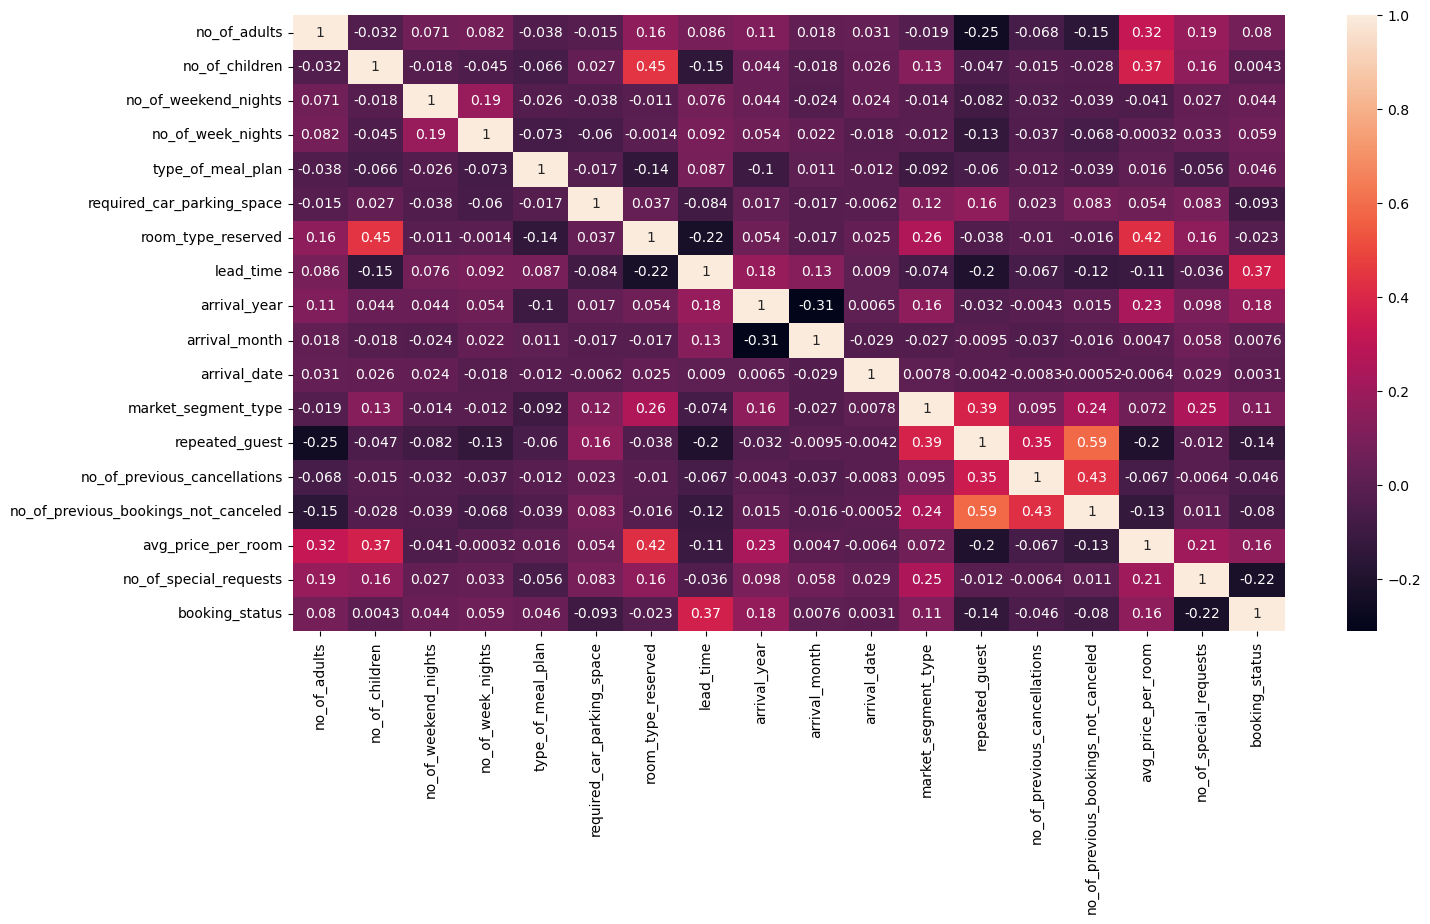

In [13]:
plt.figure(figsize=(16,8))
corrMatrix = train.corr()
sns.heatmap(corrMatrix, annot=True);


Some correlations but not problematic (around 0.5) between no_of_previous_booking_not_canceled , no_of_previous_booking_cancellations and repeated_guess. Makes sense, when a customer recurrent use a hotel (for instance for business purpose) probably have more booking without cancellation in that hotel, and also can eventually cancel the booking. The 3 variables will be maintained as they provide important information to the model. 

In [14]:
# Initial features clasification 

categorical = [
    'type_of_meal_plan',  # One hot encoding
    'required_car_parking_space',# Binary, no need of One hot encoding
    'room_type_reserved', # One hot enconding
    'market_segment_type', # One hot encoding
    'repeated_guest', # Binary, no need of One hot encoding
    
    
]
numerical_continous = [
    'avg_price_per_room', 
    'lead_time', # Number of days between the date of booking and the arrival date
]

numerical_discrete =[ 
    'no_of_previous_cancellations', 
    'no_of_previous_bookings_not_canceled',
    'no_of_week_nights',  # nteger but meaningful, hence treated as numerical features
    'no_of_weekend_nights',  # nteger but meaningful, hence treated as numerical features
    'no_of_adults', # integer but meaningful, hence treated as numerical features
    'no_of_children',  # integer but meaningful, hence treated as numerical features 
    'no_of_special_requests',  # One hot encoding
]

others = [
    'arrival_date', # Crate a seasonal sinuoidal feature mixing date (day of the month) ,  month
    'arrival_month',# covered above 
    'arrival_year', # covered above, (check also 
    # yearly_seasonal
    # day of the year
]
target = ['booking_status']

#### Dates anomalies detected

In [15]:
train[(train['arrival_date']==29) & (train['arrival_month']==2 )]['arrival_year'].unique() # insight

array([2018])

#### Timestamp, Day of the year, and yearly seasonal features

Day, month and year are given as indepent values. It s very likely that booking has yearly seasonality. To allow ML model learn from that seasonality factor let 's create a compound of sin and cos seasonal features to allow the model to undertand the seasonality. (e.g. 2 of jaunary has more relation with 30 of december than with 1 of febrary...) 

!! 2018 is not an leap-year !!! 

There are observations with yyyy-02-29, what cause error when converting to date. 

There are also some dates obvserved out of the range of the month (for instance 31st days in september). To fix this anomalies, those dates will be approximates with the maximun date of the month possible. 

In [16]:
def time_stamper(year,month,date):
    # returns timestamps,modifying date to maximun date allowed for an specific month if exceeded
    max_date = pd.to_datetime(str(year)+str(month), format = '%Y%m').days_in_month
    if date <= max_date: # max possible days in that month
        return pd.to_datetime(str(year)+str(month)+str(date), format = '%Y%m%d')
    else:
        return pd.to_datetime(str(year)+str(month)+str(max_date), format = '%Y%m%d')

In [17]:
# Step 1 timestamp
train['timestamp'] = train.apply(lambda x: time_stamper(int(x['arrival_year']), int(x['arrival_month']), int(x['arrival_date'])), axis=1)

In [18]:
# Step 2 day of the year
train['arrival_day_of_year'] = train['timestamp'].apply(lambda x:x.dayofyear)

In [19]:
# step 3 - seasonal feature sin(2*pi*x/period) and sin(2*pi*x/period) 
train['yearly_seasonal_1'] = np.sin(2*np.pi*train['arrival_day_of_year']/365)
train['yearly_seasonal_2'] = np.cos(2*np.pi*train['arrival_day_of_year']/365)

In [20]:
train.head()

,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,...,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status,timestamp,arrival_day_of_year,yearly_seasonal_1,yearly_seasonal_2
0,2,0,0,2,1,0,0,9,2018,1,...,1,11,0,67.50,0,0,2018-11-04,308,-0.831171,0.556017
1,2,0,1,2,0,0,0,117,2018,7,...,0,0,0,72.25,0,0,2018-07-29,210,-0.455907,-0.890028
2,2,0,0,1,0,0,0,315,2018,12,...,0,0,0,52.00,0,0,2018-12-02,336,-0.478734,0.877960
3,1,0,0,2,1,0,0,32,2018,12,...,0,0,0,56.00,0,0,2018-12-01,335,-0.493776,0.869589
4,2,0,1,0,0,0,0,258,2018,10,...,0,0,0,100.00,0,1,2018-10-16,289,-0.965740,0.259512


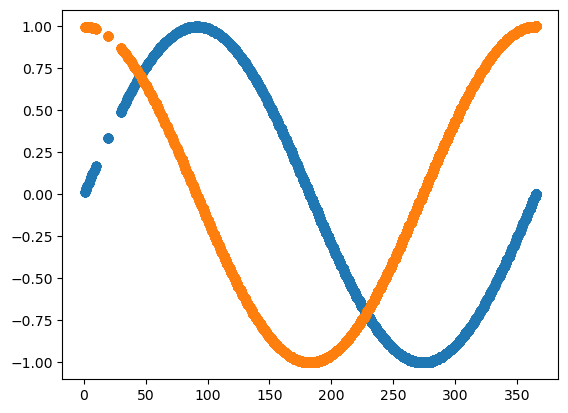

In [21]:
plt.scatter(y = train['yearly_seasonal_1'], x= train['arrival_day_of_year']);
plt.scatter(y = train['yearly_seasonal_2'], x= train['arrival_day_of_year']);

#### How each feature affect the target?

Let s preliminary visualized the distribution of each features particualized by target value

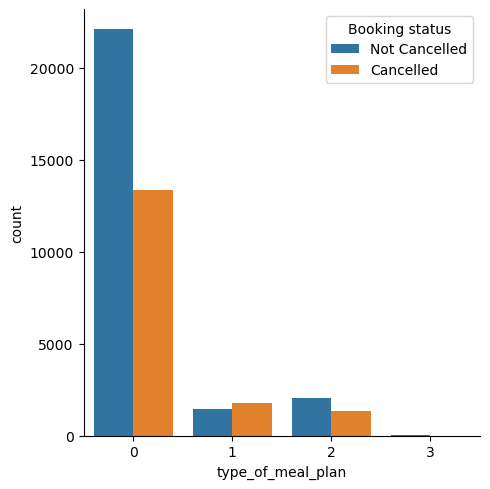

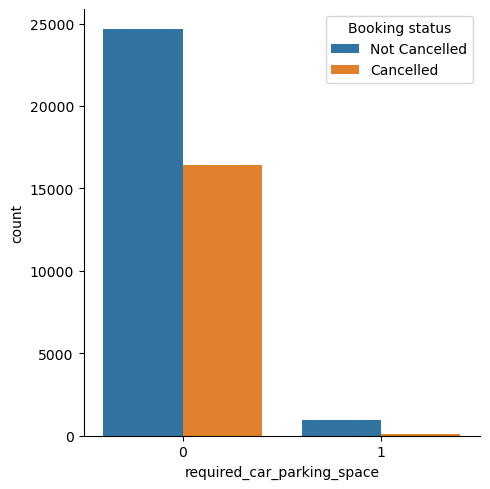

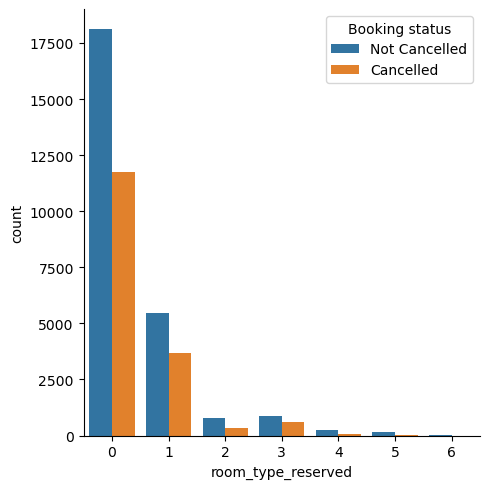

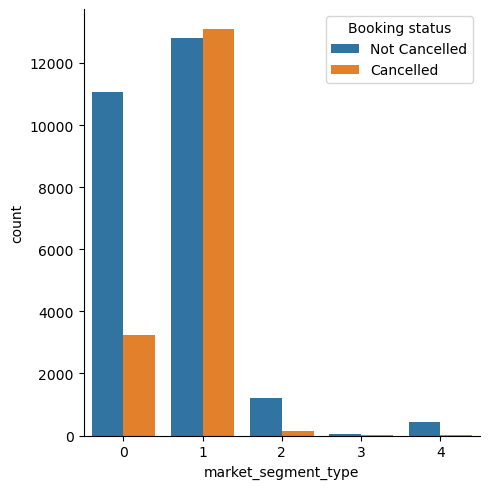

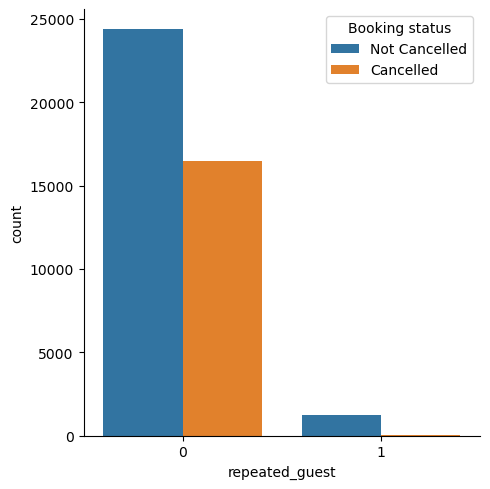

In [22]:
for i in categorical: # Categorical features
    sns.catplot(data=train,x=i, hue='booking_status', kind="count", legend=False,fill=True);
    plt.legend(title='Booking status', labels=['Not Cancelled', 'Cancelled']) 

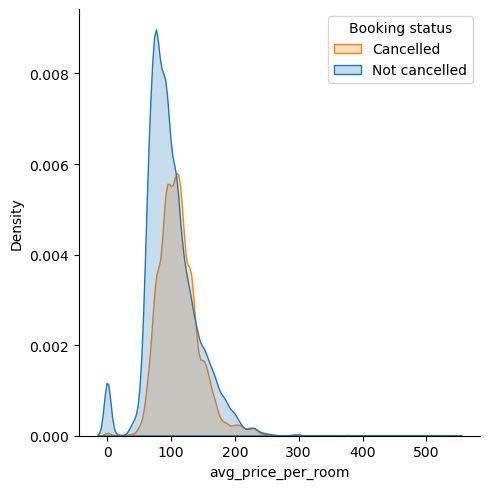

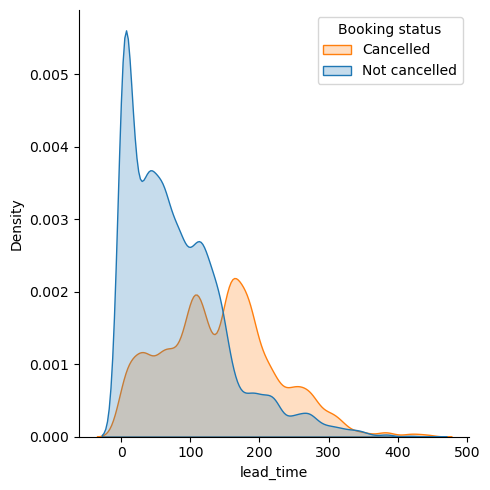

In [23]:
for i in numerical_continous: # numerical continous features
    sns.displot(data=train,x=i,hue='booking_status',legend=False,fill=True,kind='kde');
    plt.legend(title='Booking status', labels=['Cancelled', 'Not cancelled'])

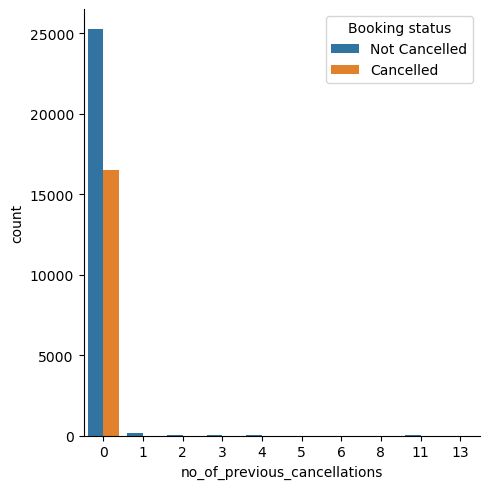

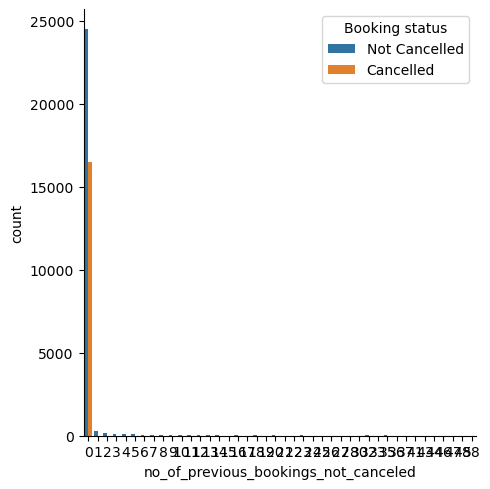

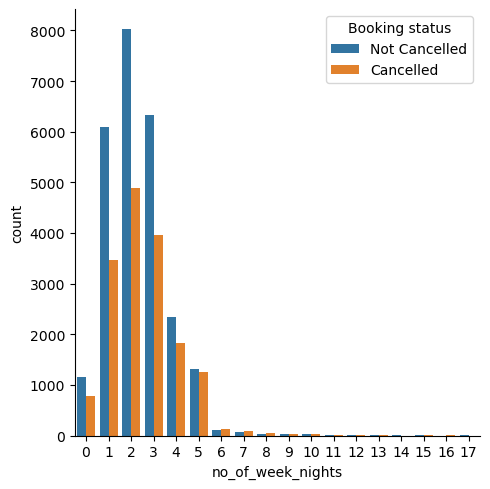

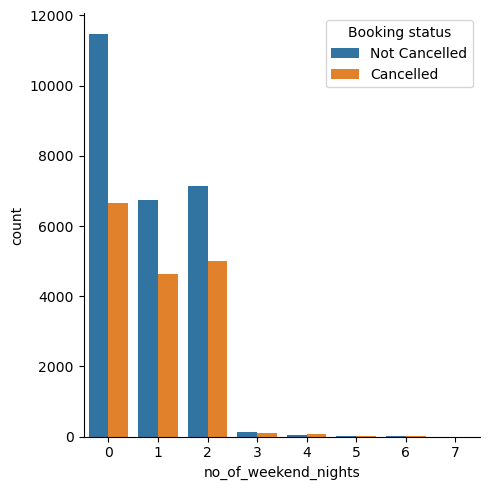

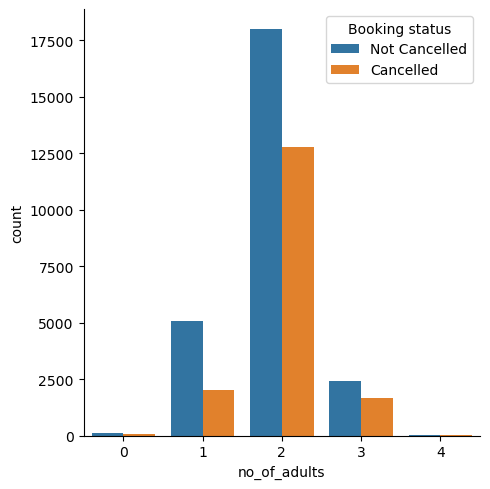

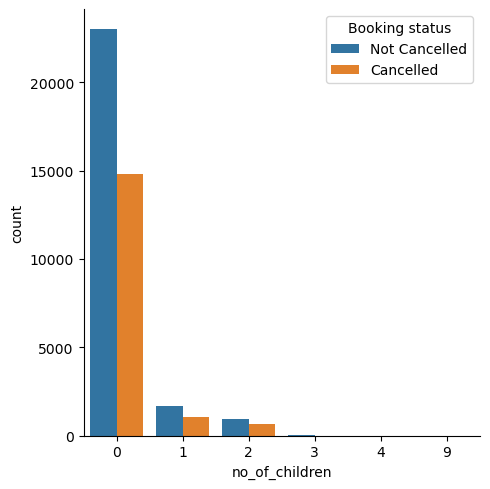

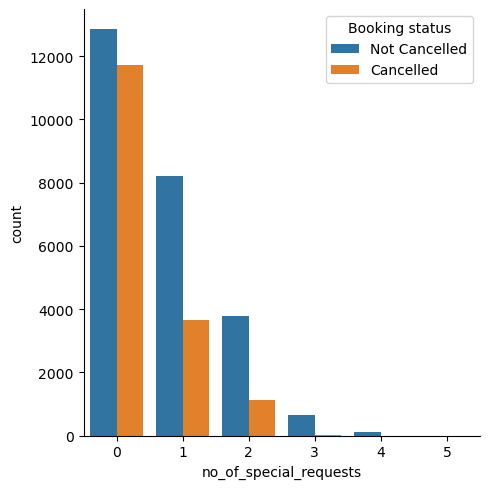

In [24]:
for i in numerical_discrete: # Categorical features
    sns.catplot(data=train,x=i, hue='booking_status', kind="count", legend=False
               # ,fill=False
               );
    #plt.plot(kind="bar", stacked=True, color=["green", "blue"], ax=ax)

    plt.legend(title='Booking status', labels=['Not Cancelled', 'Cancelled']) 

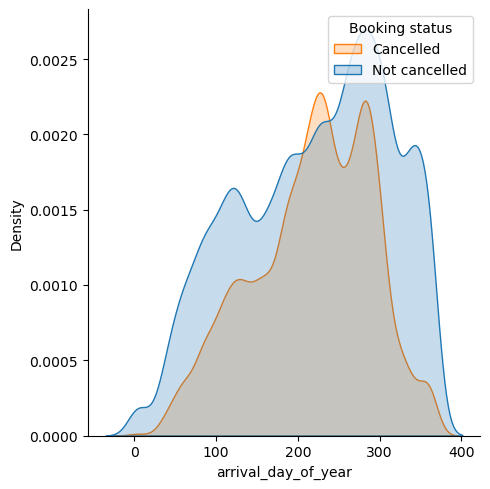

In [25]:
sns.displot(data=train,x='arrival_day_of_year',hue='booking_status',legend=False,fill=True,kind='kde');
plt.legend(title='Booking status', labels=['Cancelled', 'Not cancelled'])

In [26]:
# Let use sweetviz tool to further explore the data

my_report = sv.analyze(train)
my_report.show_html() # Default arguments will generate to "SWEETVIZ_REPORT.html"

/Users/javierliro/miniforge3/envs/tensorflow+/lib/python3.9/site-packages/sweetviz/dataframe_report.py:74: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  all_source_names = [cur_name for cur_name, cur_series in source_df.iteritems()]
/Users/javierliro/miniforge3/envs/tensorflow+/lib/python3.9/site-packages/sweetviz/dataframe_report.py:109: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  filtered_series_names_in_source = [cur_name for cur_name, cur_series in source_df.iteritems()
Feature: no_of_adults                        |  | [  4%]   00:00 -> (00:00 left)/Users/javierliro/miniforge3/envs/tensorflow+/lib/python3.9/site-packages/sweetviz/series_analyzer_cat.py:28: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for item in category_counts.iteritems():
Feature: no_of_children                      |▏ | [  9%]   00:00 -> (00:01

Report SWEETVIZ_REPORT.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.


In [27]:
# Features clasification final status: (22 in total)

categorical = [
    'type_of_meal_plan',  # Should be one hot encoding, because cardinality has no meaning
    'room_type_reserved', # One hot enconding, because cardinality has no meaning
    'market_segment_type', # One hot encoding, because cardinality has no meaning
]
numerical = [
    'avg_price_per_room', 
    'lead_time', # Number of days between the date of booking and the arrival date
    'no_of_previous_cancellations', 
    'no_of_previous_bookings_not_canceled',
    'no_of_week_nights',  # integer but meaningful, hence treated as numerical features
    'no_of_weekend_nights',  # integer but meaningful, hence treated as numerical features
    'no_of_adults', # integer but meaningful, hence treated as numerical features
    'no_of_children',  # integer but meaningful, hence treated as numerical features 
    'no_of_special_requests',  # integer but meaningful, hence treated as numerical features 
    'required_car_parking_space',# integer, binary, no need encoding
    'repeated_guest', # integer, binary, no need one hot encoding
    'arrival_year', 
]

artificial = [
    # 'timestamp', auxiliar, not going to be used. 
    'arrival_day_of_year', # Check if this works
    #'yearly_seasonal_1', # During ML Phase, resutls with yearly seasonals are worse than with 'arrival_day_of_the_year
    #'yearly_seasonal_2', # ...then seasonal features approached is dismissed
       
]

not_used = [
    'arrival_date', # covered by day_of_year
    'arrival_month',# covered by day_of_year
]
target = ['booking_status']

In [28]:
len (train.columns)

22

# Machine Learning

Few iterations with differnet models, features, training sets and hyperameters has been tested.
Results and insights has been keeped cronologically in this notebook.

In [29]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier

from sklearn.model_selection import KFold, StratifiedKFold, cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score, roc_curve

from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder

from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer

from sklearn.model_selection import RandomizedSearchCV

### 1) Evaluate different models with cross validation

In [30]:
def eval_cv_scores(classifier, X, y):
    scores = cross_val_score(classifier, X, y, cv = StratifiedKFold(n_splits = 5), scoring='roc_auc' )

    print("Cross Validation Scores: ", scores)
    print("Average CV Score: ", scores.mean())  

In [31]:
# Plain LogisticRegression + All features with no pretreat
classifier = LogisticRegression(max_iter=1000)
X = train[numerical+categorical]
y = train['booking_status']

eval_cv_scores(classifier, X, y)

Cross Validation Scores:  [0.82300903 0.82839102 0.83323443 0.83322073 0.83024386]
Average CV Score:  0.8296198113308935


In [32]:
# Plain Random Forest + All features with no pretreat
classifier = RandomForestClassifier()
X = train[numerical+categorical]
y = train['booking_status']

eval_cv_scores(classifier, X, y)

Cross Validation Scores:  [0.85576651 0.86511691 0.85825378 0.86853084 0.85589596]
Average CV Score:  0.860712801330003


In [33]:
# Plain XGBClassifier + All features with no pretreat
classifier = XGBClassifier()
X = train[numerical+categorical]
y = train['booking_status']

eval_cv_scores(classifier, X, y)

Cross Validation Scores:  [0.88643558 0.89744478 0.89345305 0.89788182 0.89008803]
Average CV Score:  0.893060653878629


In [34]:
# Plain XGBClassifier + All features with no pretreat
classifier = XGBClassifier()
X = train[numerical+categorical+artificial]
y = train['booking_status']


eval_cv_scores(classifier, X, y)

Cross Validation Scores:  [0.88817833 0.90053166 0.89506338 0.89912083 0.89174115]
Average CV Score:  0.8949270683556904


In [35]:
# Pipeline XGBClassifier One hot encoding categorical

ct = ColumnTransformer([('bypass', 'passthrough' , numerical + artificial ),
                    ('categorical_prepoc', OneHotEncoder(handle_unknown='ignore') , categorical )])

pipe = Pipeline([('prepoc',ct),('classifier',XGBClassifier())])

X = train[numerical+categorical+artificial]
y = train['booking_status']


eval_cv_scores(pipe, X, y)

Cross Validation Scores:  [0.89011269 0.89829448 0.89707317 0.90062726 0.89308813]
Average CV Score:  0.8958391448622098


In [36]:
# Pipeline XGBClassifier normalizing numericals and One hot encoding categorical

ct = ColumnTransformer([('numerical_prepoc',StandardScaler() , numerical + artificial),
                    ('categorical_prepoc', OneHotEncoder(handle_unknown='ignore') , categorical )])

pipe = Pipeline([('prepoc',ct),('classifier',XGBClassifier())])

X = train[numerical+categorical+artificial]
y = train['booking_status']


eval_cv_scores(pipe, X, y)

Cross Validation Scores:  [0.89011269 0.89830986 0.89705648 0.90061939 0.89308907]
Average CV Score:  0.8958374996794793


### 2) Hyper Paramters tunning

In [37]:
xgb_grid = {
    'n_estimators': [100,150,200,250,300,600],
    'learning_rate': [0.05, 0.10, 0.15, 0.20, 0.25, 0.30 ],
    'max_depth': [ 3, 4, 5, 6, 8, 10, 12, 15],
    'min_child_weight': [ 1, 3, 5, 7 ],
    'gamma': [ 0.0, 0.1, 0.2 , 0.3, 0.4 ],
    'colsample_bytree': [ 0.3, 0.4, 0.5 , 0.7 ]
}

In [38]:
# Create the model to be tuned
xgb_base = XGBClassifier()
X = train[numerical+categorical+artificial]
y = train['booking_status']


# Create the random search Random Forest
xgb_random = RandomizedSearchCV(estimator = xgb_base, param_distributions = xgb_grid, 
                                n_iter = 50, cv = 3, verbose = 2, 
                                random_state = 420, n_jobs = -1)

# Fit the random search model
xgb_random.fit(X, y)



# Get the optimal parameters
xgb_random.best_params_

Fitting 3 folds for each of 50 candidates, totalling 150 fits


{'n_estimators': 200,
 'min_child_weight': 3,
 'max_depth': 12,
 'learning_rate': 0.05,
 'gamma': 0.0,
 'colsample_bytree': 0.3}

In [38]:
best_params = {'n_estimators': 200,
               'min_child_weight': 3,
               'max_depth': 12,
               'learning_rate': 0.05,
               'gamma': 0.0,
               'colsample_bytree': 0.3
              }

### 3.1 Check pipeline with hyperparameters optimiezed and cross validation

In [39]:
# Pipeline XGBClassifier normalizing numericals and One hot encoding categorical

ct = ColumnTransformer([('numerical_prepoc',StandardScaler() , numerical + artificial),
                    ('categorical_prepoc', OneHotEncoder(handle_unknown='ignore') , categorical )])

pipe = Pipeline([('prepoc',ct),('classifier',XGBClassifier(**best_params))])

X = train[numerical+categorical+artificial]
y = train['booking_status']


eval_cv_scores(pipe, X, y)

Cross Validation Scores:  [0.89395543 0.90310099 0.90060584 0.90268919 0.89486791]
Average CV Score:  0.8990438719332129


### 3.2 Check pipeline with hyperparameters optimiezed and simple train/test split

In [43]:
# Evaluate a model and get roc_auc and plot roc curve
def eval_model(classifier, X, y):
    
    X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2)

    classifier.fit(X_train, y_train)
    preds = classifier.predict(X_test)
    probs = classifier.predict_proba(X_test)
    
    print ("roc auc score:", roc_auc_score(y_test, probs[:, 1])) # Using probs instead of preds ...
    fpr, tpr, thresholds = roc_curve(y_test, probs[:, 1])
    plt.plot(fpr, tpr);
    plt.title("roc curve");

Cross Validation Scores:  [0.89395543 0.90310099 0.90060584 0.90268919 0.89486791]
Average CV Score:  0.8990438719332129
roc auc score: 0.8952234067018301


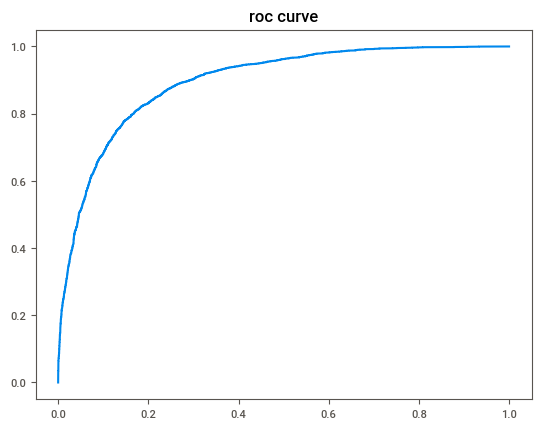

In [44]:
ct = ColumnTransformer([('numerical_prepoc',StandardScaler() , numerical + artificial),
                    ('categorical_prepoc', OneHotEncoder(handle_unknown='ignore') , categorical )])

pipe = Pipeline([('prepoc',ct),('classifier',XGBClassifier(**best_params))])

X = train[numerical+categorical+artificial]
y = train['booking_status']

eval_cv_scores(pipe, X, y)
eval_model(pipe, X, y) # Using probs instead of preds get the best score..


### 4. Prepare a first submission

- 4.1 Fit model with all train dataset
- 4.2 Add 'arrival_day_of_year' to test dataset
- 4.3 Makes predictions 
- 4.4 Prepare and export to csv format


In [45]:
# 4.1 Fit model with all train dataset

ct = ColumnTransformer([('numerical_prepoc',StandardScaler() , numerical + artificial),
                    ('categorical_prepoc', OneHotEncoder(handle_unknown='ignore') , categorical )])

pipe = Pipeline([('prepoc',ct),('classifier',XGBClassifier(**best_params))])

X = train[numerical+categorical+artificial]
y = train['booking_status']

pipe.fit(X,y) # Using the whole dataset

Pipeline(steps=[('prepoc',
                 ColumnTransformer(transformers=[('numerical_prepoc',
                                                  StandardScaler(),
                                                  ['avg_price_per_room',
                                                   'lead_time',
                                                   'no_of_previous_cancellations',
                                                   'no_of_previous_bookings_not_canceled',
                                                   'no_of_week_nights',
                                                   'no_of_weekend_nights',
                                                   'no_of_adults',
                                                   'no_of_children',
                                                   'no_of_special_requests',
                                                   'required_car_parking_space',
                                                   'repeated_guest',
                                                   'arri...
                               feature_types=None, gamma=0.0, gpu_id=None,
                               grow_policy=None, importance_type=None,
                               interaction_constraints=None, learning_rate=0.05,
                               max_bin=None, max_cat_threshold=None,
                               max_cat_to_onehot=None, max_delta_step=None,
                               max_depth=12, max_leaves=None,
                               min_child_weight=3, missing=nan,
                               monotone_constraints=None, n_estimators=200,
                               n_jobs=None, num_parallel_tree=None,
                               predictor=None, random_state=None, ...))])

In [46]:
# 4.2 Add 'arrival_day_of_year' to test dataset

# Step 1 timestamp
test['timestamp'] = test.apply(lambda x: time_stamper(int(x['arrival_year']), int(x['arrival_month']), int(x['arrival_date'])), axis=1)
# Step 2 day of the year
test['arrival_day_of_year'] = test['timestamp'].apply(lambda x:x.dayofyear)

In [47]:
# 4.3 Makes predictions
#preds = pipe.predict(test[numerical+categorical+artificial])
preds = pipe.predict_proba(test[numerical+categorical+artificial])

In [48]:
preds[:,1]

array([0.12200689, 0.05109002, 0.2847119 , ..., 0.10431542, 0.67308503,
       0.903841  ], dtype=float32)

In [48]:
# 4.4 Prepare and export to csv format
sub = pd.read_csv('Data/sample_submission.csv')
sub['booking_status'] = preds[:,1]
sub.head()


,id,booking_status
0,42100,0.122007
1,42101,0.051090
2,42102,0.284712
3,42103,0.065847
4,42104,0.450641


In [49]:
sub.dtypes

id                  int64
booking_status    float32
dtype: object

In [64]:
sub.to_csv('Data/submission2.csv', index=False )

### 5. Augment data with real dataset

Let s see if adding the real dataset to the train/test data provided improves the score

- 1 Add 'arrival_day_of_year' to the new train dataset
- 2 Fit model with new train dataset
- 3 Check new approch scoring
- 4 Makes predictions with full dataset
- 5 Prepare and export to csv format


In [83]:
train = pd.read_csv("data/train.csv")
train.drop('id', axis=1, inplace=True);

In [84]:
train_dataset = pd.read_csv("data/train__dataset.csv")

In [85]:
train.head()

,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
0,2,0,0,2,1,0,0,9,2018,1,14,1,1,11,0,67.50,0,0
1,2,0,1,2,0,0,0,117,2018,7,29,0,0,0,0,72.25,0,0
2,2,0,0,1,0,0,0,315,2018,12,2,0,0,0,0,52.00,0,0
3,1,0,0,2,1,0,0,32,2018,12,1,1,0,0,0,56.00,0,0
4,2,0,1,0,0,0,0,258,2018,10,16,0,0,0,0,100.00,0,1


In [86]:
train_dataset.head()

,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
0,2,0,1,4,0,0,0,118,2017,12,28,1,0,0,0,110.80,2,0
1,2,1,0,2,0,0,0,17,2018,4,14,1,0,0,0,145.00,0,1
2,1,0,1,5,0,0,0,349,2018,10,4,0,0,0,0,96.67,0,1
3,1,0,2,4,0,0,0,69,2018,6,12,0,0,0,0,120.00,0,1
4,2,0,0,4,1,0,0,11,2018,1,20,1,0,0,0,69.50,1,0


In [87]:
augmented_train = pd.concat([train, train_dataset])

In [88]:
print(augmented_train.shape)
print(train.shape)
print(train_dataset.shape)

(60237, 18)
(42100, 18)
(18137, 18)


In [89]:
# 5.2 Add 'arrival_day_of_year' to augmented_train dataset

# Step 1 timestamp
augmented_train['timestamp'] = augmented_train.apply(lambda x: time_stamper(int(x['arrival_year']), int(x['arrival_month']), int(x['arrival_date'])), axis=1)
# Step 2 day of the year
augmented_train['arrival_day_of_year'] = augmented_train['timestamp'].apply(lambda x:x.dayofyear)

Cross Validation Scores:  [0.90031674 0.90229037 0.90513312 0.91908868 0.93823237]
Average CV Score:  0.9130122550462664
roc auc score: 0.9150731903198924


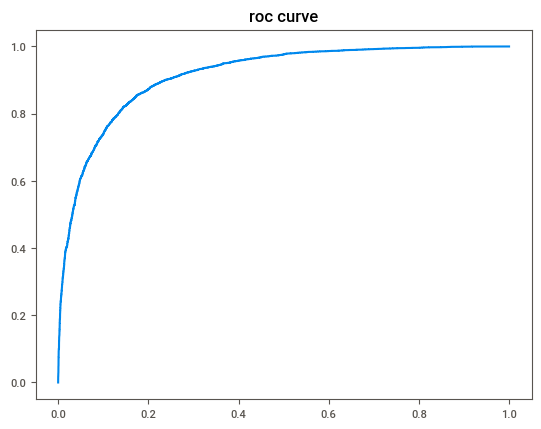

In [90]:
# 5.3 Check new approach scoring 

ct = ColumnTransformer([('numerical_prepoc',StandardScaler() , numerical + artificial),
                    ('categorical_prepoc', OneHotEncoder(handle_unknown='ignore') , categorical )])

pipe = Pipeline([('prepoc',ct),('classifier',XGBClassifier(**best_params))])

X = augmented_train[numerical+categorical+artificial]
y = augmented_train['booking_status']

eval_cv_scores(pipe, X, y)
eval_model(pipe, X, y) # Using probs instead of preds get the best score..

In [91]:
# 5.4 Fit with augmented dataset with the whole train dataset

ct = ColumnTransformer([('numerical_prepoc',StandardScaler() , numerical + artificial),
                    ('categorical_prepoc', OneHotEncoder(handle_unknown='ignore') , categorical )])

pipe = Pipeline([('prepoc',ct),('classifier',XGBClassifier(**best_params))])

X = augmented_train[numerical+categorical+artificial]
y = augmented_train['booking_status']

pipe.fit(X,y)


Pipeline(steps=[('prepoc',
                 ColumnTransformer(transformers=[('numerical_prepoc',
                                                  StandardScaler(),
                                                  ['avg_price_per_room',
                                                   'lead_time',
                                                   'no_of_previous_cancellations',
                                                   'no_of_previous_bookings_not_canceled',
                                                   'no_of_week_nights',
                                                   'no_of_weekend_nights',
                                                   'no_of_adults',
                                                   'no_of_children',
                                                   'no_of_special_requests',
                                                   'required_car_parking_space',
                                                   'repeated_guest',
                                                   'arri...
                               feature_types=None, gamma=0.0, gpu_id=None,
                               grow_policy=None, importance_type=None,
                               interaction_constraints=None, learning_rate=0.05,
                               max_bin=None, max_cat_threshold=None,
                               max_cat_to_onehot=None, max_delta_step=None,
                               max_depth=12, max_leaves=None,
                               min_child_weight=3, missing=nan,
                               monotone_constraints=None, n_estimators=200,
                               n_jobs=None, num_parallel_tree=None,
                               predictor=None, random_state=None, ...))])

In [92]:
# 5.5 predictions

preds = pipe.predict_proba(test[numerical+categorical+artificial])

In [93]:
# 5.6 Prepare and export to csv format
sub = pd.read_csv('Data/sample_submission.csv')
sub['booking_status'] = preds[:,1]
sub.head()

,id,booking_status
0,42100,0.147766
1,42101,0.043275
2,42102,0.254513
3,42103,0.065808
4,42104,0.354265


In [61]:
sub.to_csv('Data/submission3.csv', index=False ) # 0.91...

## 6 Check duplicates between train and test data 

It s been detected that there are some observations in train that are in test as well.

Also, the value of booking_status seems to be inverted in those pairs duplicated. 

In [111]:
def count_duplicates(df):
    print ("Total duplicate rows :", df.shape[0] - df.drop_duplicates().shape[0] )

In [66]:
train.columns

Index(['no_of_adults', 'no_of_children', 'no_of_weekend_nights',
       'no_of_week_nights', 'type_of_meal_plan', 'required_car_parking_space',
       'room_type_reserved', 'lead_time', 'arrival_year', 'arrival_month',
       'arrival_date', 'market_segment_type', 'repeated_guest',
       'no_of_previous_cancellations', 'no_of_previous_bookings_not_canceled',
       'avg_price_per_room', 'no_of_special_requests', 'booking_status'],
      dtype='object')

In [69]:
test.columns

Index(['id', 'no_of_adults', 'no_of_children', 'no_of_weekend_nights',
       'no_of_week_nights', 'type_of_meal_plan', 'required_car_parking_space',
       'room_type_reserved', 'lead_time', 'arrival_year', 'arrival_month',
       'arrival_date', 'market_segment_type', 'repeated_guest',
       'no_of_previous_cancellations', 'no_of_previous_bookings_not_canceled',
       'avg_price_per_room', 'no_of_special_requests', 'timestamp',
       'arrival_day_of_year'],
      dtype='object')

In [74]:
dup_features = list(train.drop('booking_status', axis=1).columns)

In [75]:
count_duplicates(pd.concat([train[dup_features], test[dup_features]]))

Total duplicate rows : 1531


In [76]:
count_duplicates(pd.concat([train[dup_features], train_dataset[dup_features]]))

Total duplicate rows : 6516


In [77]:
count_duplicates(pd.concat([train_dataset[dup_features], test[dup_features]]))

Total duplicate rows : 5640


 - Lets create a function that exploits this data leakage by means of getting the target from train and modify the submission obtained in previous steps, but inverted {0: 1, 1: 0}

In [236]:
def dataleak_exploiter(predictions): # Once you have the best predictions, use this to assing values based on the data leakage 
    
    train = pd.read_csv("Data/train.csv")
    test = pd.read_csv("Data/test.csv")
    sub = pd.read_csv('Data/sample_submission.csv')
    
    # get your best predictions
    sub.booking_status = predictions
    
    # Assing data leakages
    y = 'booking_status'
    dup_features = test.drop(columns='id').columns.tolist()
    values_to_assign = test.merge(train.drop(columns='id'), on=dup_features, how='inner')[['id', y]]
    map_di = {0: sub[y].max(), 1: sub[y].min()}  #  {0: 1, 1: 0} 
    sub.loc[sub.id.isin(values_to_assign.id), y] = values_to_assign[y].map(map_di).values
    
    return sub

In [73]:
preds[:,1]

array([0.14776632, 0.04327497, 0.25451252, ..., 0.09070358, 0.7063905 ,
       0.92000234], dtype=float32)

In [102]:
dataleak_sub = dataleak_exploiter(preds[:,1])

In [104]:
dataleak_sub.to_csv('Data/submission4.csv', index=False ) # 0.92...

#### 7 Drop train observations where there was a data leakage before training.  

If the targets are inverted in training (0 means 1, 1 means 0), that is actually making the predictions worse.
Let's delete those observations before training and afterward pass the dataleak_exploiter
- 1) Drop duplicates in augmented data
- 2) Find values that are in test and invert their target values
- 3) Fit the model and make predictions
- 4) Pass dataleak_exploiter to predictions
- 5) prepare submissions

In [243]:
# We rescue a list with the duplicated columns between test and train
dup_features = list(train.drop('booking_status', axis=1).columns)

In [244]:
# 1 - Drop duplicates in augmented data
count_duplicates(augmented_train)

finetuned_train = augmented_train.drop_duplicates()

count_duplicates(finetuned_train)
count_duplicates(pd.concat([finetuned_train[dup_features], test[dup_features]])) 

Total duplicate rows : 5664
Total duplicate rows : 0
Total duplicate rows : 2776


In [228]:
# 2 - Find train rows that are in test and drop them

In [245]:
# 2.1 Left merge train and test with indicator saying if exist in left right or both
finetuned_train = augmented_train.merge(test[dup_features], on=dup_features, how='left', indicator='exists')
finetuned_train['exists'].unique()

['left_only', 'both']
Categories (3, object): ['left_only', 'right_only', 'both']

In [246]:
# 2.2 Drop both and right_only (then we maintain just left_only)
finetuned_train = finetuned_train[finetuned_train.exists == 'left_only']

In [247]:
# 2.3 Drop the unnecesary column exist
finetuned_train = finetuned_train.drop('exists', axis=1)

In [248]:
finetuned_train

,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status,timestamp,arrival_day_of_year
0,2,0,0,2,1,0,0,9,2018,1,14,1,1,11,0,67.50,0,0,2018-11-04,308
1,2,0,1,2,0,0,0,117,2018,7,29,0,0,0,0,72.25,0,0,2018-07-29,210
2,2,0,0,1,0,0,0,315,2018,12,2,0,0,0,0,52.00,0,0,2018-12-02,336
3,1,0,0,2,1,0,0,32,2018,12,1,1,0,0,0,56.00,0,0,2018-12-01,335
4,2,0,1,0,0,0,0,258,2018,10,16,0,0,0,0,100.00,0,1,2018-10-16,289
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
60721,2,0,0,5,0,0,0,205,2018,7,26,1,0,0,0,70.03,1,1,2018-07-26,207
60722,1,0,0,2,0,0,0,103,2018,4,19,0,0,0,0,115.00,0,1,2018-04-19,109
60723,2,0,0,3,0,0,0,129,2018,8,10,1,0,0,0,88.01,1,0,2018-08-10,222
60724,2,0,0,1,0,0,0,90,2018,7,13,1,0,0,0,105.30,0,1,2018-07-13,194


In [249]:
# 3 Fit the model and make predictions
ct = ColumnTransformer([('numerical_prepoc',StandardScaler() , numerical + artificial),
                    ('categorical_prepoc', OneHotEncoder(handle_unknown='ignore') , categorical )])

pipe = Pipeline([('prepoc',ct),('classifier',XGBClassifier(**best_params))])

X = finetuned_train[numerical+categorical+artificial]
y = finetuned_train['booking_status']

pipe.fit(X,y)


Pipeline(steps=[('prepoc',
                 ColumnTransformer(transformers=[('numerical_prepoc',
                                                  StandardScaler(),
                                                  ['avg_price_per_room',
                                                   'lead_time',
                                                   'no_of_previous_cancellations',
                                                   'no_of_previous_bookings_not_canceled',
                                                   'no_of_week_nights',
                                                   'no_of_weekend_nights',
                                                   'no_of_adults',
                                                   'no_of_children',
                                                   'no_of_special_requests',
                                                   'required_car_parking_space',
                                                   'repeated_guest',
                                                   'arri...
                               feature_types=None, gamma=0.0, gpu_id=None,
                               grow_policy=None, importance_type=None,
                               interaction_constraints=None, learning_rate=0.05,
                               max_bin=None, max_cat_threshold=None,
                               max_cat_to_onehot=None, max_delta_step=None,
                               max_depth=12, max_leaves=None,
                               min_child_weight=3, missing=nan,
                               monotone_constraints=None, n_estimators=200,
                               n_jobs=None, num_parallel_tree=None,
                               predictor=None, random_state=None, ...))])

In [250]:
preds = pipe.predict_proba(test[numerical+categorical+artificial])

In [251]:
# 4 Pass dataleak_exploiter to predictions
dataleak_sub = dataleak_exploiter(preds[:,1])

In [252]:
# 5 Submit 
dataleak_sub.to_csv('Data/submission5.csv', index=False ) 
# 0.92 this approach does not improves, let dismiss it.


#### 8) Repeat approach 6 (beter score) with a more intensive hyper parameter optimization

- N iterations 200
- Using augmented_train

In [253]:
xgb_grid = {
    'n_estimators': [100,150,200,250,300,600],
    'learning_rate': [0.05, 0.10, 0.15, 0.20, 0.25, 0.30 ],
    'max_depth': [ 3, 4, 5, 6, 8, 10, 12, 15],
    'min_child_weight': [ 1, 3, 5, 7 ],
    'gamma': [ 0.0, 0.1, 0.2 , 0.3, 0.4 ],
    'colsample_bytree': [ 0.3, 0.4, 0.5 , 0.7 ]
}

In [254]:
# Create the model to be tuned
xgb_base = XGBClassifier()
X = augmented_train[numerical+categorical+artificial]
y = augmented_train['booking_status']


# Create the random search Random Forest
xgb_random = RandomizedSearchCV(estimator = xgb_base, param_distributions = xgb_grid, 
                                n_iter = 200, cv = 3, verbose = 2, 
                                random_state = 420, n_jobs = -1)

# Fit the random search model
xgb_random.fit(X, y)



# Get the optimal parameters
xgb_random.best_params_

Fitting 3 folds for each of 200 candidates, totalling 600 fits
[CV] END colsample_bytree=0.4, gamma=0.4, learning_rate=0.25, max_depth=5, min_child_weight=1, n_estimators=150; total time=   2.0s
[CV] END colsample_bytree=0.5, gamma=0.2, learning_rate=0.15, max_depth=4, min_child_weight=7, n_estimators=300; total time=   3.4s
[CV] END colsample_bytree=0.5, gamma=0.2, learning_rate=0.15, max_depth=4, min_child_weight=7, n_estimators=300; total time=   3.4s
[CV] END colsample_bytree=0.4, gamma=0.4, learning_rate=0.15, max_depth=12, min_child_weight=3, n_estimators=150; total time=   5.1s
[CV] END colsample_bytree=0.3, gamma=0.0, learning_rate=0.05, max_depth=12, min_child_weight=3, n_estimators=200; total time=   4.9s
[CV] END colsample_bytree=0.4, gamma=0.0, learning_rate=0.25, max_depth=5, min_child_weight=5, n_estimators=300; total time=   3.6s
[CV] END colsample_bytree=0.7, gamma=0.3, learning_rate=0.15, max_depth=6, min_child_weight=1, n_estimators=600; total time=  12.8s
[CV] END co

/Users/javierliro/miniforge3/envs/tensorflow+/lib/python3.9/site-packages/joblib/externals/loky/process_executor.py:700: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(


{'n_estimators': 600,
 'min_child_weight': 5,
 'max_depth': 10,
 'learning_rate': 0.05,
 'gamma': 0.3,
 'colsample_bytree': 0.3}

In [255]:
new_best_params = {'n_estimators': 600,
                   'min_child_weight': 5,
                   'max_depth': 10,
                   'learning_rate': 0.05,
                   'gamma': 0.3,
                   'colsample_bytree': 0.3}

In [268]:
# 3 Fit the model and make predictions

classifier = XGBClassifier(**new_best_params)
ct = ColumnTransformer([('numerical_prepoc',StandardScaler() , numerical + artificial),
                    ('categorical_prepoc', OneHotEncoder(handle_unknown='ignore') , categorical )])

pipe = Pipeline([('prepoc',ct),('classifier',classifier)])

X = augmented_train[numerical+categorical+artificial]
y = augmented_train['booking_status']

pipe.fit(X,y)

Pipeline(steps=[('prepoc',
                 ColumnTransformer(transformers=[('numerical_prepoc',
                                                  StandardScaler(),
                                                  ['avg_price_per_room',
                                                   'lead_time',
                                                   'no_of_previous_cancellations',
                                                   'no_of_previous_bookings_not_canceled',
                                                   'no_of_week_nights',
                                                   'no_of_weekend_nights',
                                                   'no_of_adults',
                                                   'no_of_children',
                                                   'no_of_special_requests',
                                                   'required_car_parking_space',
                                                   'repeated_guest',
                                                   'arri...
                               feature_types=None, gamma=0.3, gpu_id=None,
                               grow_policy=None, importance_type=None,
                               interaction_constraints=None, learning_rate=0.05,
                               max_bin=None, max_cat_threshold=None,
                               max_cat_to_onehot=None, max_delta_step=None,
                               max_depth=10, max_leaves=None,
                               min_child_weight=5, missing=nan,
                               monotone_constraints=None, n_estimators=600,
                               n_jobs=None, num_parallel_tree=None,
                               predictor=None, random_state=None, ...))])

In [269]:
preds = pipe.predict_proba(test[numerical+categorical+artificial])

In [270]:
dataleak_sub = dataleak_exploiter(preds[:,1])

In [263]:
dataleak_sub.to_csv('Data/submission6.csv', index=False )

[CV] END colsample_bytree=0.4, gamma=0.4, learning_rate=0.25, max_depth=5, min_child_weight=1, n_estimators=150; total time=   1.9s
[CV] END colsample_bytree=0.7, gamma=0.1, learning_rate=0.2, max_depth=5, min_child_weight=1, n_estimators=250; total time=   4.5s
[CV] END colsample_bytree=0.4, gamma=0.4, learning_rate=0.05, max_depth=4, min_child_weight=1, n_estimators=200; total time=   2.1s
[CV] END colsample_bytree=0.7, gamma=0.2, learning_rate=0.15, max_depth=10, min_child_weight=3, n_estimators=100; total time=   4.2s
[CV] END colsample_bytree=0.5, gamma=0.4, learning_rate=0.3, max_depth=3, min_child_weight=7, n_estimators=200; total time=   1.8s
[CV] END colsample_bytree=0.7, gamma=0.4, learning_rate=0.1, max_depth=5, min_child_weight=7, n_estimators=200; total time=   3.7s
[CV] END colsample_bytree=0.3, gamma=0.2, learning_rate=0.25, max_depth=15, min_child_weight=5, n_estimators=200; total time=   5.7s
[CV] END colsample_bytree=0.3, gamma=0.0, learning_rate=0.1, max_depth=3, min